In [1]:
import random
import time

In [2]:
spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "data": {
        "name": "data",
        "values": [
            {"x": random.gauss(0, 1), "y": random.gauss(0, 1), "t": t}
            for t in range(20)
        ],
    },
    "encoding": {
        "x": {"type": "quantitative", "field": "x"},
        "y": {"type": "quantitative", "field": "y"},
    }
}

# Static Vega Plot

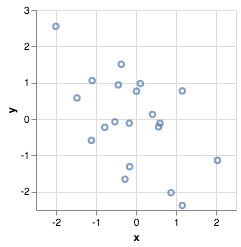

In [3]:
from vega import VegaLite
VegaLite(spec=spec)

# Vega Plot with dynamic updates

In [4]:
from vega.widget import VegaWidget

widget = VegaWidget(spec=spec)
display(widget)

# update the plot dynamically
for t in range(20, 30):
    value = dict(
        x=random.gauss(0.0, 1.0),
        y=random.gauss(0.0, 1.0),
        t=t,
    )
    widget.update('data', remove=f'datum.t < {t - 10}', insert=[value])
    time.sleep(0.1)

VegaWidget()

In [5]:
from ipywidgets import VBox, Label, Button

In [6]:
plot = VegaWidget(spec=spec)
button = Button(description="Add new data point")

@button.on_click
def on_click_handler(*_):
    value = dict(
        x=random.gauss(0.0, 1.0),
        y=random.gauss(0.0, 1.0),
    )
    plot.update('data', insert=[value])

VBox([Label("Vega plot embedded in another widget"), plot, button])